## Load packages

In [1]:
import numpy as np
import pandas as pd

import spaco

import scanpy as sc
import squidpy as sq

import matplotlib
import seaborn as sns

## Load the pre-processed dataset

In [2]:
# seqFISH mouse embryo dataset
adata_cellbin_bkp = sq.datasets.seqfish()

# make a copy (optional)
adata_cellbin = adata_cellbin_bkp.copy()

# extract the pre-annotated label from anndata
adata_cellbin.obs['annotation'] = adata_cellbin.obs['celltype_mapped_refined'].copy()
adata_cellbin.obs['annotation'] = adata_cellbin.obs['annotation'].astype(str).astype('category')

## Filter cell types (optional)

In [3]:
# filter out cell types with less than 10 cells
min_cells=10
unique_tmp = np.unique(adata_cellbin.obs['annotation'],return_counts=True)
adata_cellbin = adata_cellbin[adata_cellbin.obs['annotation'].isin(unique_tmp[0][unique_tmp[1]>min_cells])].copy()

# filter out unannotated cell types
adata_cellbin = adata_cellbin[adata_cellbin.obs['annotation']!="Unannotated"].copy()

# save filtered data
# adata_cellbin.write("./data/seqFish.h5ad")

In [4]:
# read filtered data
# adata_cellbin = sc.read_h5ad("./data/seqFish.h5ad")

adata_cellbin

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined', 'annotation'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'X_umap', 'spatial'

## Color assignment optimization with a given palette

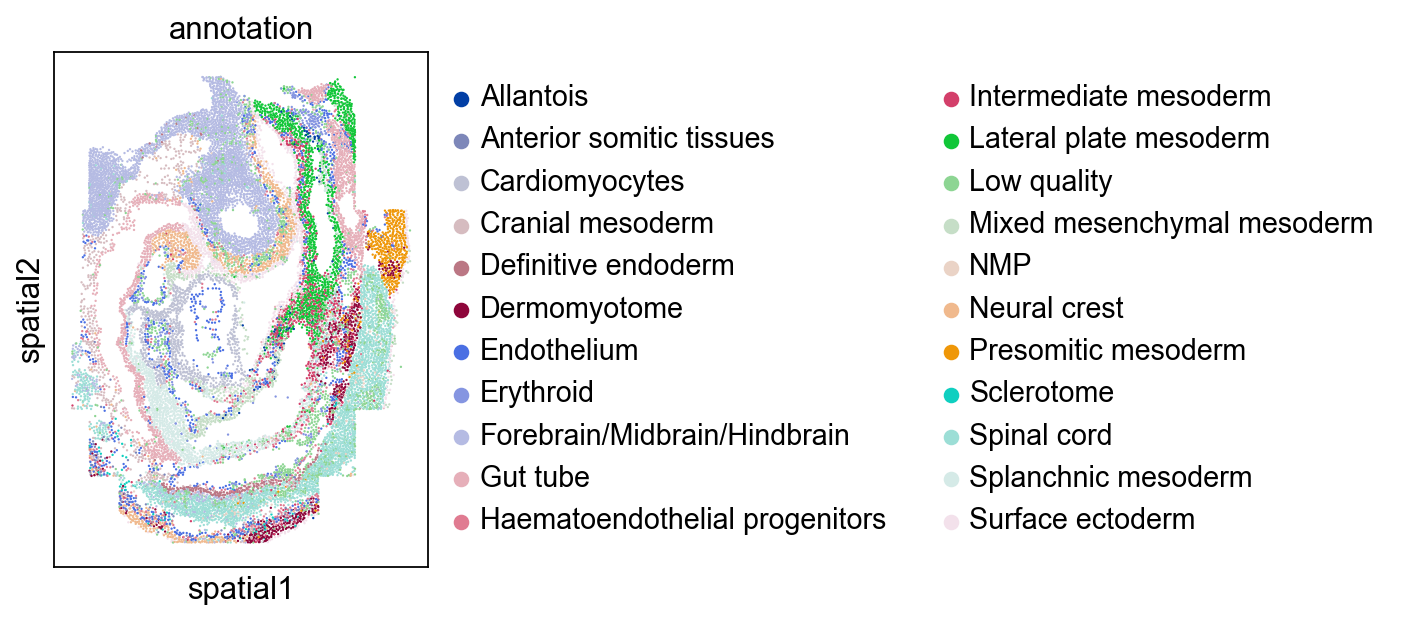

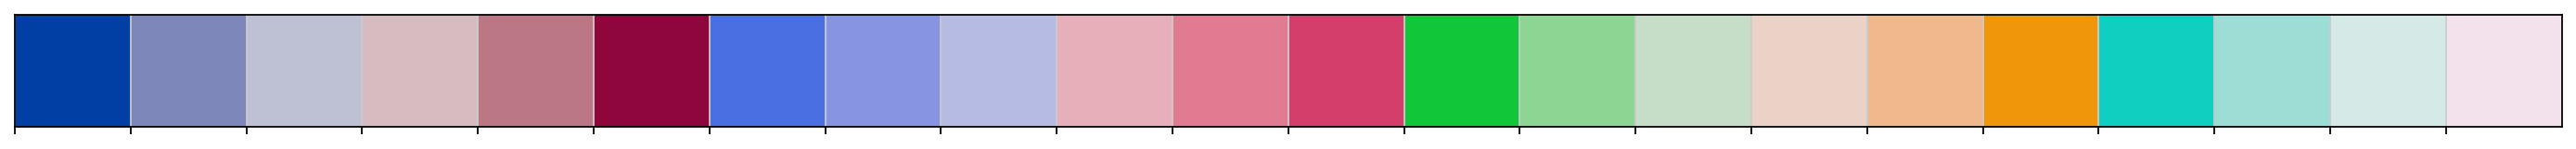

In [5]:
# Get a default palette via matplotlib visualization
sc.set_figure_params(figsize=(3,6), facecolor="white", dpi_save=300)
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=0.035)

palette_default = adata_cellbin.uns['annotation_colors'].copy()
sns.palplot(palette_default)

In [6]:
# Get optimized color-cluster assignment with Spaco
color_mapping = spaco.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    colorblind_type="none",
    radius=0.05, # radius is related to the physical scaling of .obsm['spatial']
    n_neighbors=30,
    palette=palette_default, # if `palette` is specified, the `colorize` function only refines the assignment.
)

color_mapping

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Calculating color distance graph...
|-----------> Calculating color perceptual distance...
|-----------> Constructing color distance graph...
|-----> Optimizing color mapping...


{'Allantois': '#b5bbe3',
 'Anterior somitic tissues': '#7d87b9',
 'Cardiomyocytes': '#d6bcc0',
 'Cranial mesoderm': '#8dd593',
 'Definitive endoderm': '#e6afb9',
 'Dermomyotome': '#d33f6a',
 'Endothelium': '#11c638',
 'Erythroid': '#8595e1',
 'Forebrain/Midbrain/Hindbrain': '#0fcfc0',
 'Gut tube': '#e07b91',
 'Haematoendothelial progenitors': '#f3e1eb',
 'Intermediate mesoderm': '#d5eae7',
 'Lateral plate mesoderm': '#8e063b',
 'Low quality': '#ef9708',
 'Mixed mesenchymal mesoderm': '#bb7784',
 'NMP': '#f0b98d',
 'Neural crest': '#ead3c6',
 'Presomitic mesoderm': '#c6dec7',
 'Sclerotome': '#bec1d4',
 'Spinal cord': '#023fa5',
 'Splanchnic mesoderm': '#9cded6',
 'Surface ectoderm': '#4a6fe3'}

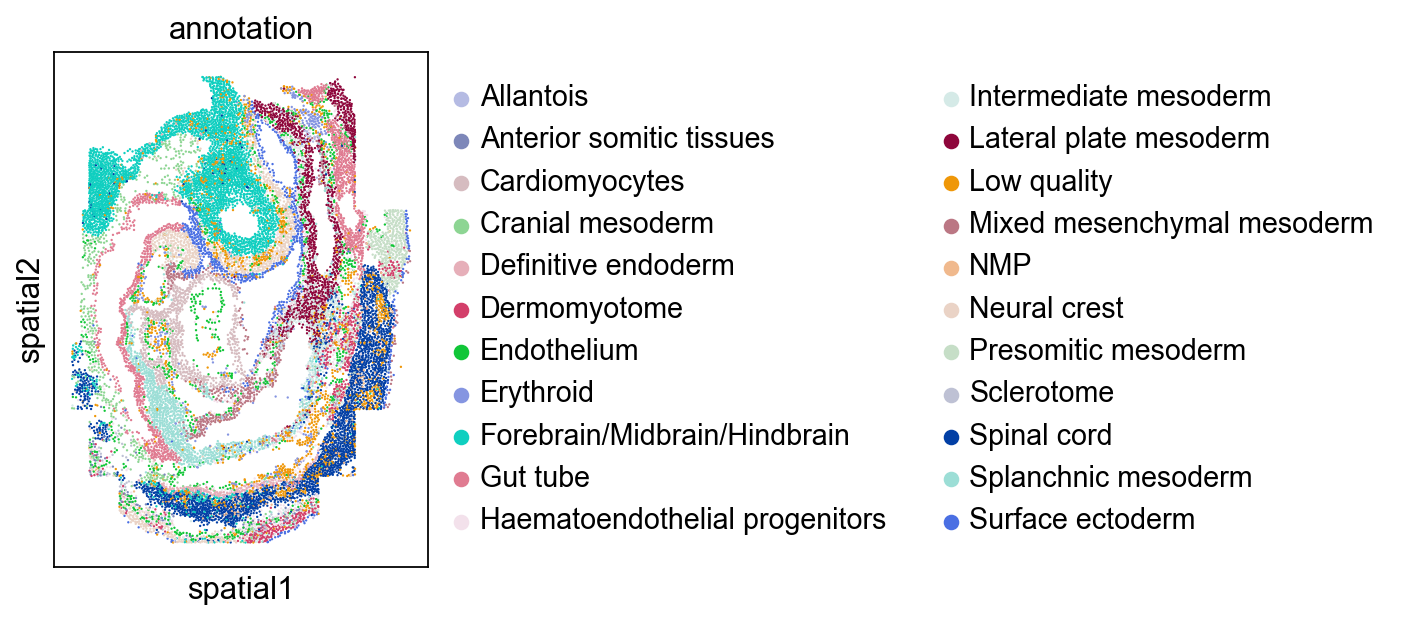

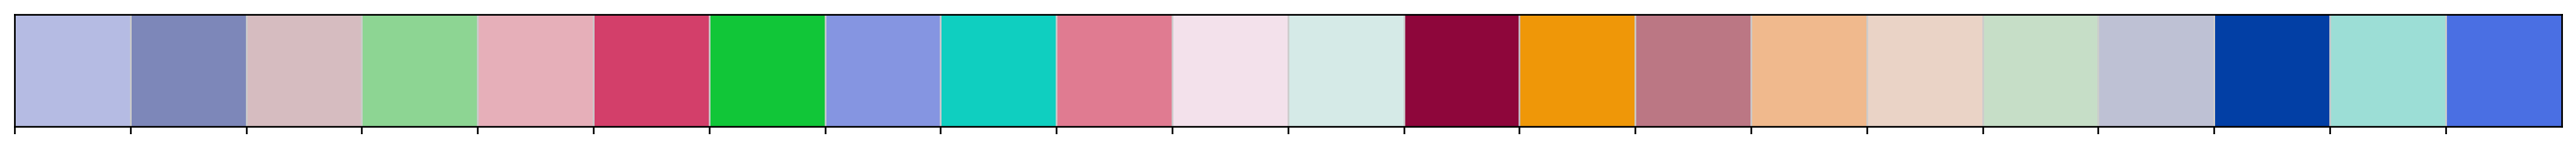

In [7]:
# Get visualization with optimized color assignment
color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=0.035, palette=palette_spaco)
sns.palplot(palette_spaco)

## Automatic colorization (CI-graph guided)

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> `palette` not provided.
|-----------> Auto-generating colors from CIE Lab colorspace...
|-----------------> Calculating cluster embedding...


/home/jingzh/.conda/envs/spaco_dev/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/jingzh/.conda/envs/spaco_dev/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


|-----------------> Rescaling embedding to CIE Lab colorspace...
|-----> Optimizing cluster color mapping...


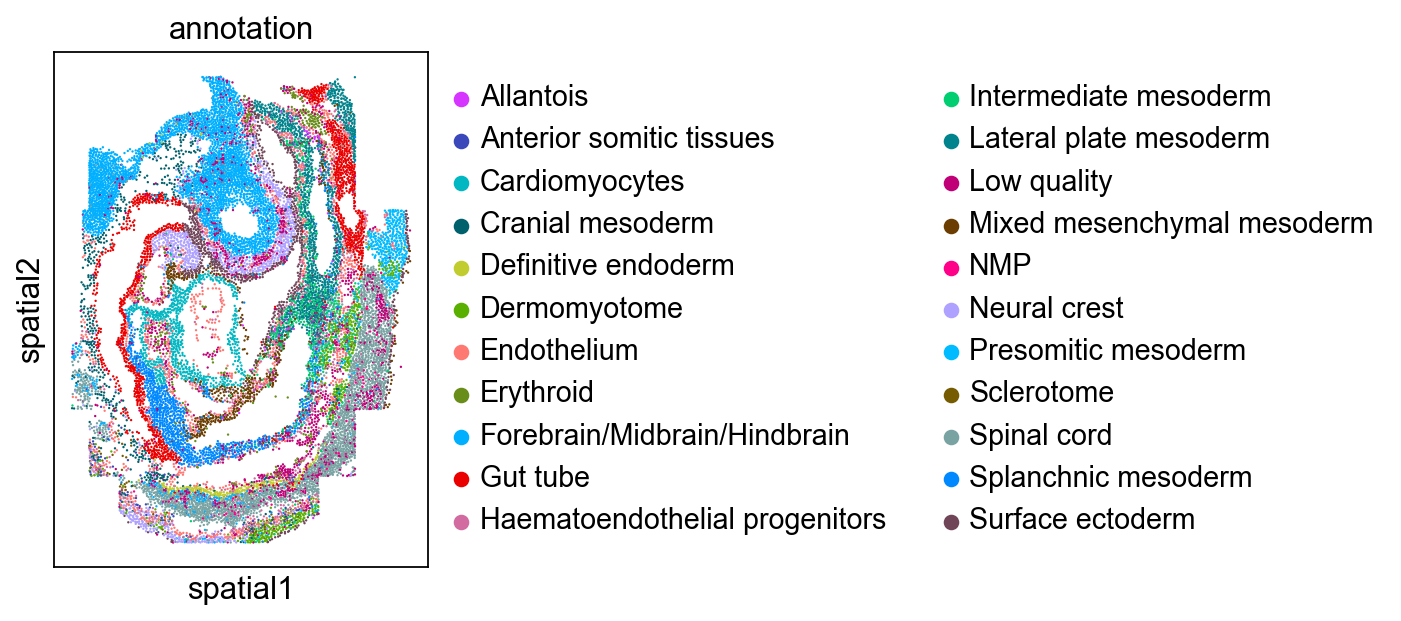

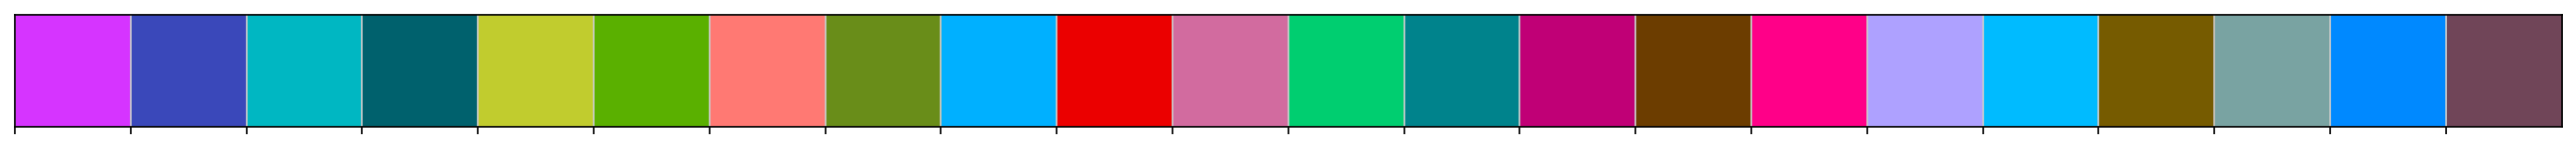

In [8]:
# Get optimized color palette and assignment with Spaco
color_mapping = spaco.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    colorblind_type="none",
    radius=0.3,
    n_neighbors=30,
    # palette=None, # when `palette` is not available, Spaco applies an automatic color selection
)

#color_mapping

# Get visualization with optimized colorization
color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
palette_umap = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=0.035, palette=palette_umap)
sns.palplot(palette_umap)

## Automatic colorization (Image guided)

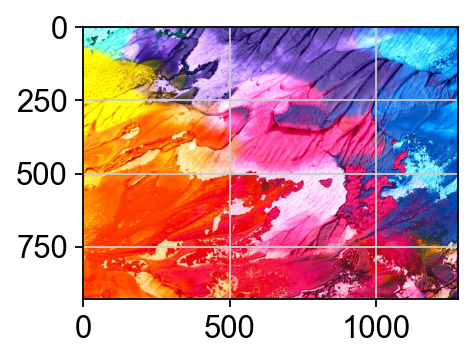

In [9]:
from PIL import Image

img = Image.open("./data/colorful-2468874_1280.jpg").convert("RGB")
matplotlib.pyplot.imshow(img)

|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> `palette` not provided.
|-----------> Using `image palette`...
|-----------> Drawing appropriate colors from provided image...
|-----------------> Extracting color bins...
|-----------------> Initiating palette...
|-----------------> Optimizing extracted palette...
|-----> Calculating color distance graph...
|-----------> Calculating color perceptual distance...
|-----------> Constructing color distance graph...
|-----> Optimizing color mapping...


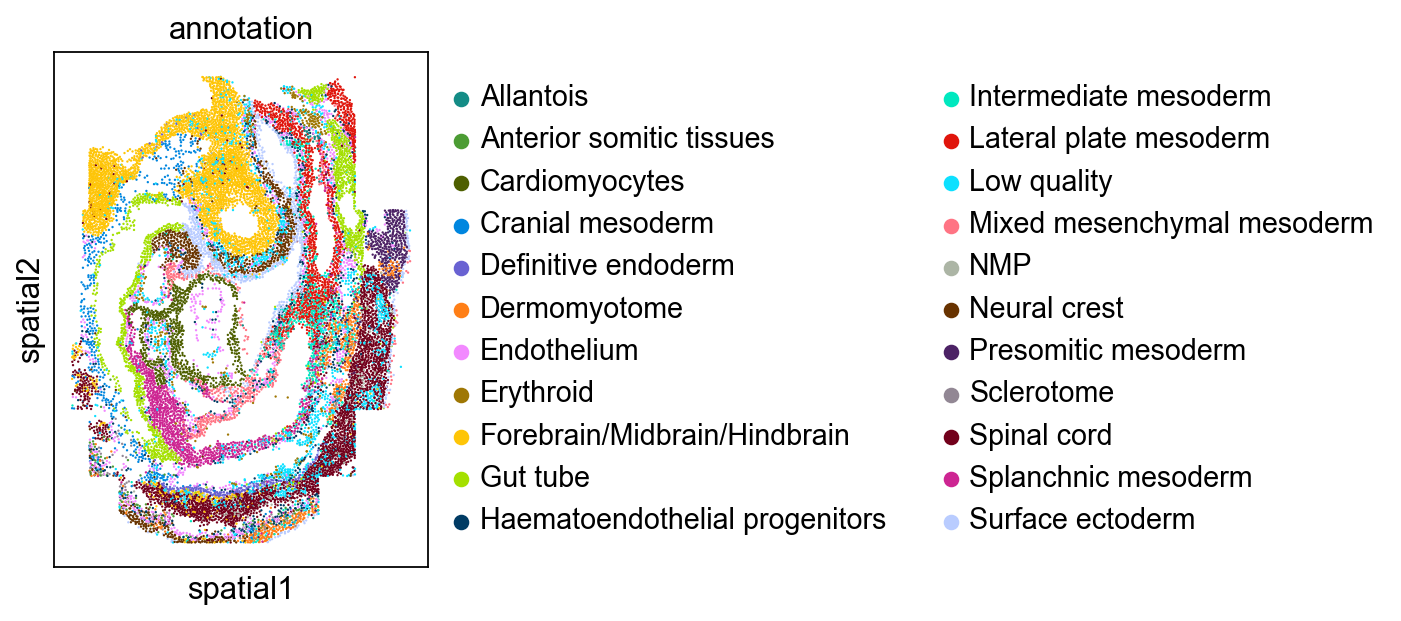

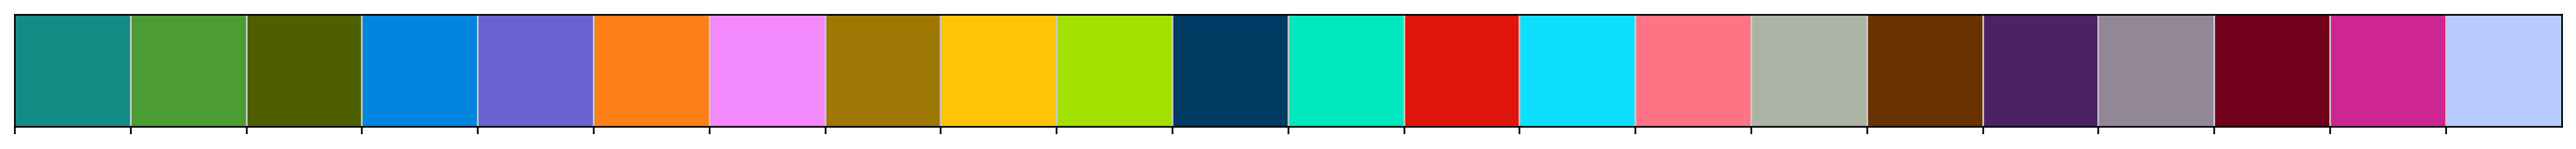

In [10]:
# Get optimized color palette and assignment from an image
# this step can be time consuming according to the resolution of the image
color_mapping = spaco.colorize(
    cell_coordinates=adata_cellbin.obsm['spatial'],
    cell_labels=adata_cellbin.obs['annotation'],
    colorblind_type="none",
    radius=0.3,
    n_neighbors=30,
    # palette=None, # when `palette` is not available, Spaco applies an automatic color selection
    image_palette=img, # when `img_palette` is available, Spaco applies image-guided palette extraction 
)

# Get visualization with optimized colorization
color_mapping = {k: color_mapping[k] for k in adata_cellbin.obs['annotation'].cat.categories}

# Set new colors for adata
palette_img = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata_cellbin, color="annotation", spot_size=0.035, palette=palette_img)
sns.palplot(palette_img)

## Separated usage of automatic color extraction

|-----------------> Extracting color bins...
|-----------------> Initiating palette...
|-----------------> Optimizing extracted palette...
['#0f1fa1', '#06654c', '#0081f6', '#b80050', '#683300', '#dfaa00', '#eaa3ff', '#5adfef', '#ff7256', '#6de674']


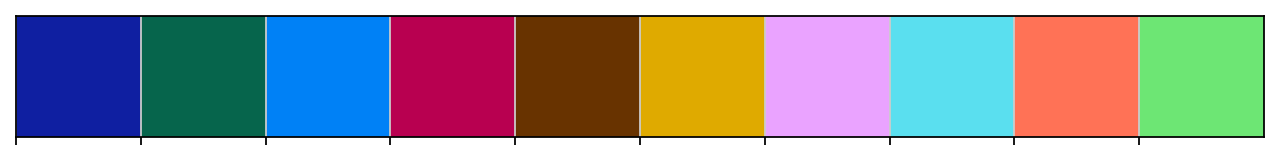

In [11]:
# Spaco also supports separated usage of its functions (e.g. the theme-extraction function)

# We welcome users to selectively use Spaco's features rather than solely use our wrapped functions

extracted_palette = spaco.utils.extract_palette(img, n_colors=10, colorblind_type="none")
print(extracted_palette)

sns.palplot(extracted_palette)

## Colorization on multiple plots (between tissue slices)

In [12]:
# Load the pre-processed dataset
adata = sc.read_h5ad("./data/10DPI_1_left.h5ad")
radata = sc.read_h5ad("./data/15DPI_1_left.h5ad")

/tmp/ipykernel_2725620/525643131.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', 20)


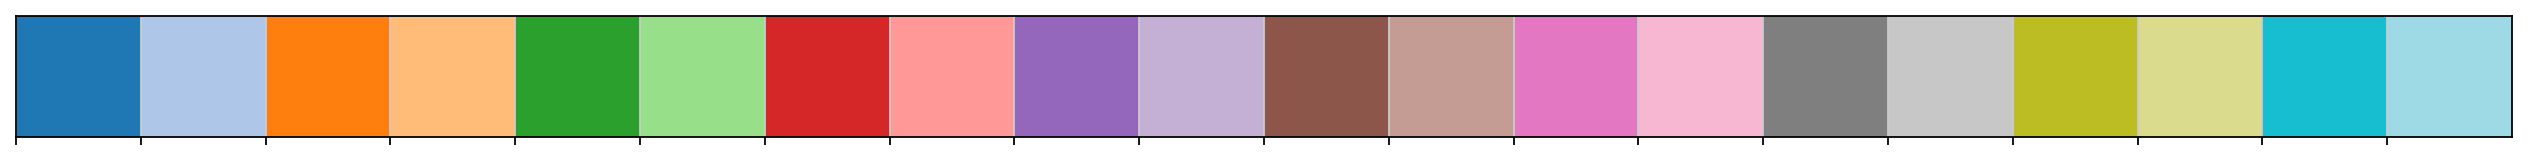

In [13]:
# get a pre-defined color palette
from pylab import *

cmap = cm.get_cmap('tab20', 20)
palette_default = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(20)]
sns.palplot(palette_default)

In [14]:
# Get optimized color assignment between two slices

cluster_key = "Annotation" # clusters are pre-annotated in this dataset

color_mapping_adata = spaco.colorize_mutiple_slices(
    adatas=[adata, radata],
    cluster_key=cluster_key, # use a pre-annotation as identical labeling between the two slices, if not provided, will perform auto-alignment
    colorblind_type="none",
    radius=90,
    n_neighbors=16,
    palette=palette_default,
)
color_mapping_adata

|-----> Calculating cluster distance graph for slice 0... 
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Calculating cluster distance graph for slice 1... 
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Merging cluster distance graph... 
|-----> Calculating color distance graph...
|-----------> Calculating color perceptual distance...
|-----------> Constructing color distance graph...
|-----> Optimizing color mapping...


{'CCKIN': '#dbdb8d',
 'CMPN': '#1f77b4',
 'CP': '#c7c7c7',
 'IMN': '#7f7f7f',
 'MCG': '#9467bd',
 'MSN': '#d62728',
 'NPYIN': '#bcbd22',
 'NTNG1EX': '#e377c2',
 'OBNBL': '#98df8a',
 'OLIGO': '#ff9896',
 'SCGNIN': '#9edae5',
 'SSTIN': '#ffbb78',
 'TLNBL': '#17becf',
 'VLMC': '#ff7f0e',
 'dpEX': '#2ca02c',
 'mpEX': '#aec7e8',
 'nptxEX': '#c5b0d5',
 'reaEGC': '#c49c94',
 'sfrpEGC': '#f7b6d2',
 'wntEGC': '#8c564b'}

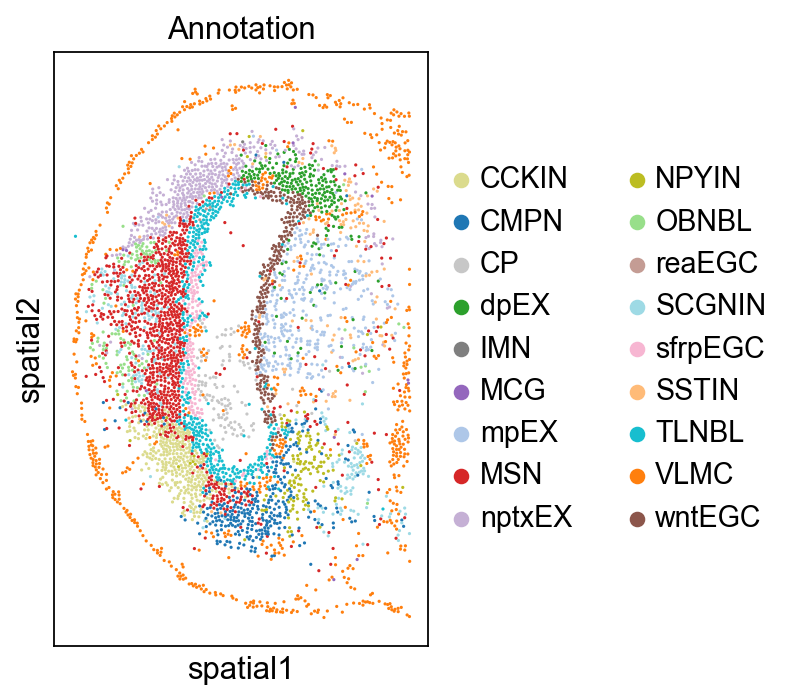

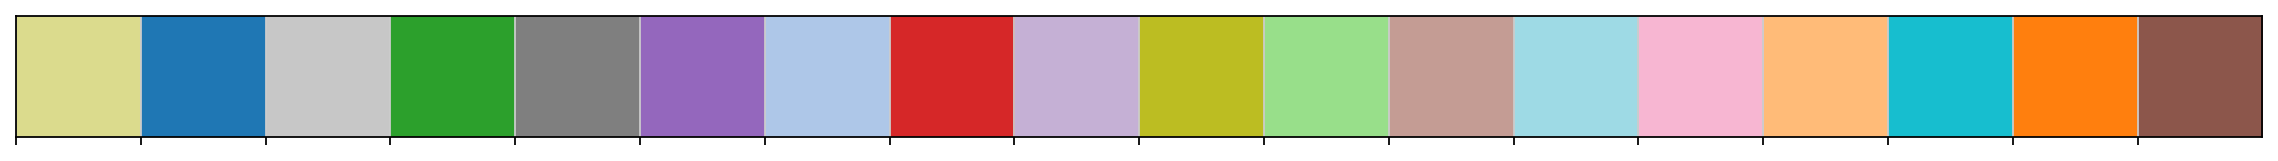

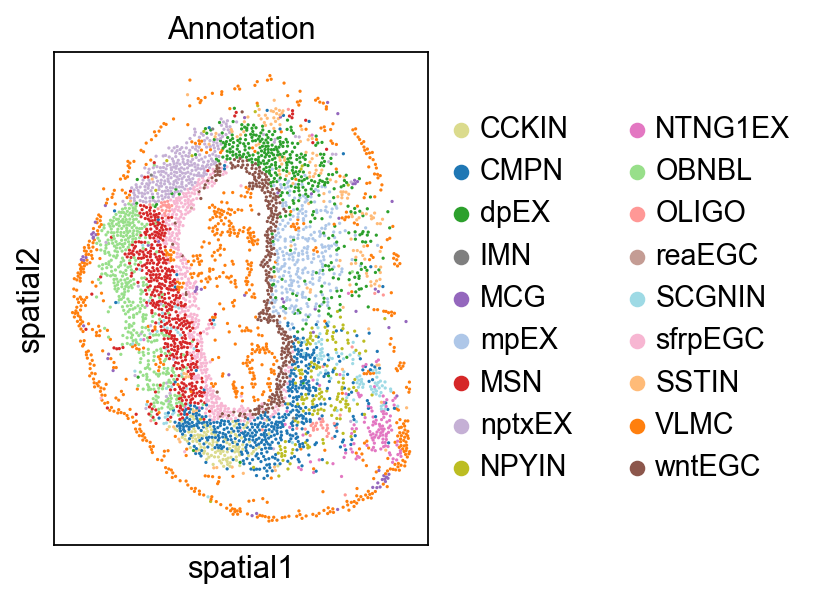

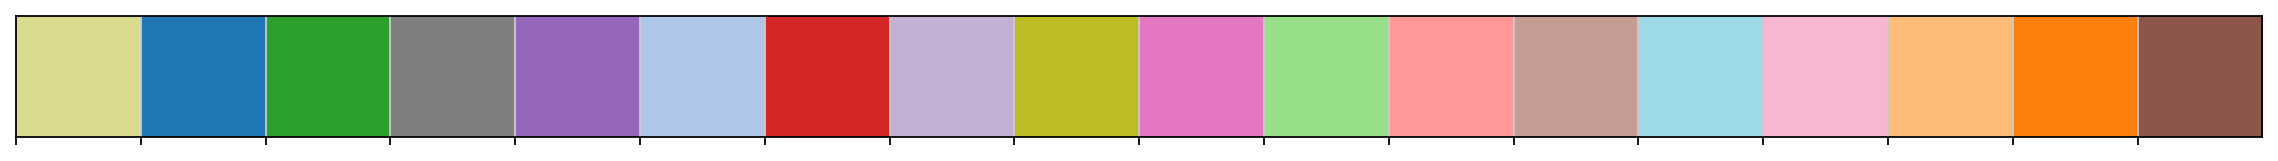

In [15]:
# Get visualization for `adata` with optimized color assignment
color_mapping = {k: color_mapping_adata[k] for k in adata.obs[cluster_key].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata, color=cluster_key , spot_size=30, palette=palette_spaco)
sns.palplot(palette_spaco)

# Get visualization for `radata` with optimized color assignment
color_mapping2 = {k: color_mapping_adata[k] for k in radata.obs[cluster_key].cat.categories}

# Set new colors for adata
palette_spaco2 = list(color_mapping2.values())

# Spaco colorization
sc.pl.spatial(radata, color=cluster_key, spot_size=30, palette=palette_spaco2)
sns.palplot(palette_spaco2)

## Colorization on multiple plots (between clustering results)

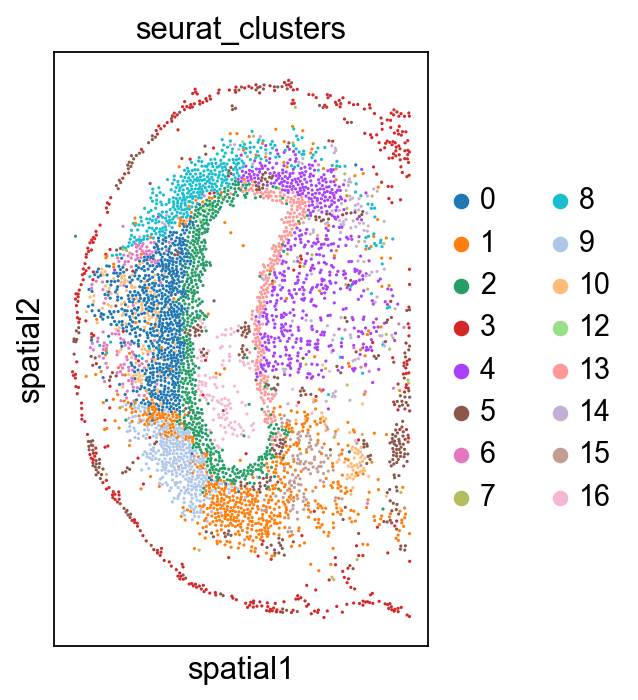

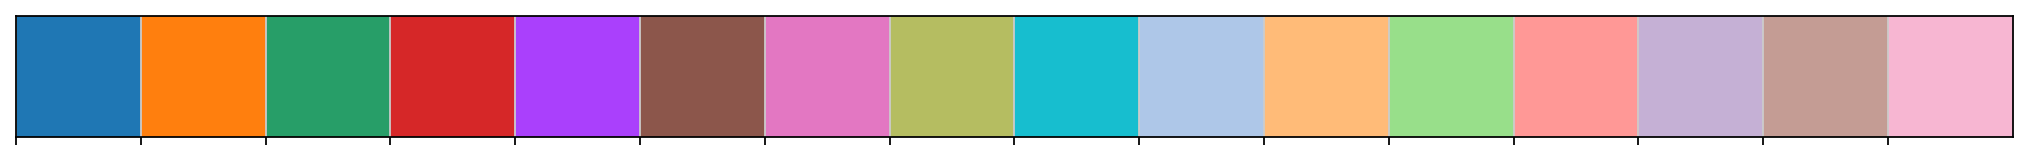

In [16]:
# get a pre-defined color palette from matplotlib default
sc.pl.spatial(adata, spot_size=30, color='seurat_clusters')
palette_default = adata.uns['seurat_clusters_colors'].copy()
sns.palplot(palette_default)

In [17]:
# Get optimized color assignment between two clustering results
# Spaco applies an automatic label alignment which yields a new label in .obs and suffix `_spaco2`
cluster_keys = ['seurat_clusters','spatial_leiden_e30_s8']
color_mapping_adata = spaco.colorize_mutiple_runs(
    adata=adata,
    cluster_keys=cluster_keys,
    colorblind_type="none",
    radius=90,
    n_neighbors=16,
    palette=palette_default,
)

cluster_keys = [cluster_key + "_spaco2" for cluster_key in cluster_keys]

adata

|-----> Mapping clusters between runs...
|-----------------> <insert> 'seurat_clusters_spaco2' to obs in AnnData Object.
|-----------> Mapping run 1 to run 0...
|-----------------> <insert> 'spatial_leiden_e30_s8_spaco2' to obs in AnnData Object.
|-----------> Mapped cluster name added to `adata.obs['***_spaco2']`. Result color mapping will base on new cluster name.
|-----> Calculating cluster distance graph for run 0... 
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Calculating cluster distance graph for run 1... 
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Merging cluster distance graph... 
|-----> Calculating color distance graph...


AnnData object with n_obs × n_vars = 4811 × 27600
    obs: 'CellID', 'spatial_leiden_e30_s8', 'Batch', 'cell_id', 'seurat_clusters', 'inj_uninj', 'D_V', 'inj_M_L', 'Annotation', 'seurat_clusters_spaco2', 'spatial_leiden_e30_s8_spaco2'
    var: 'Gene'
    uns: 'Injury_10DPI_rep1_SS200000147BL_B5', '__type', 'angle_dict', 'Annotation_colors', 'seurat_clusters_colors'
    obsm: 'X_pca', 'X_spatial', 'spatial'
    layers: 'counts'

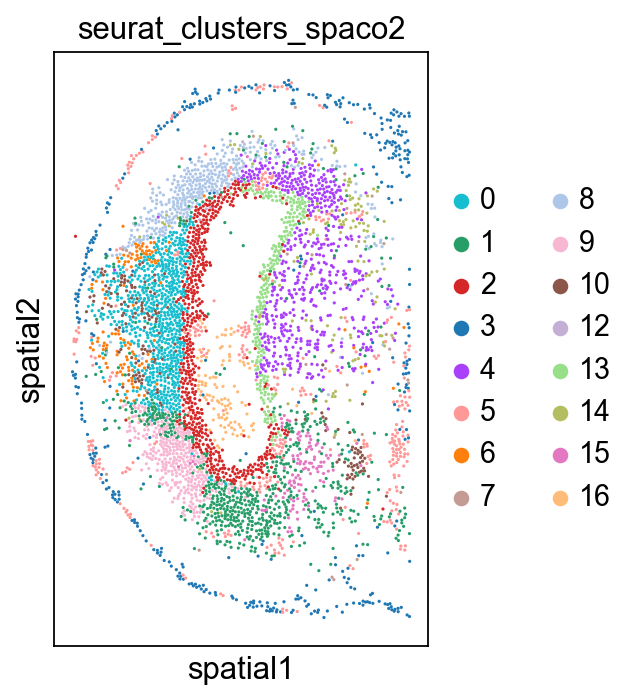

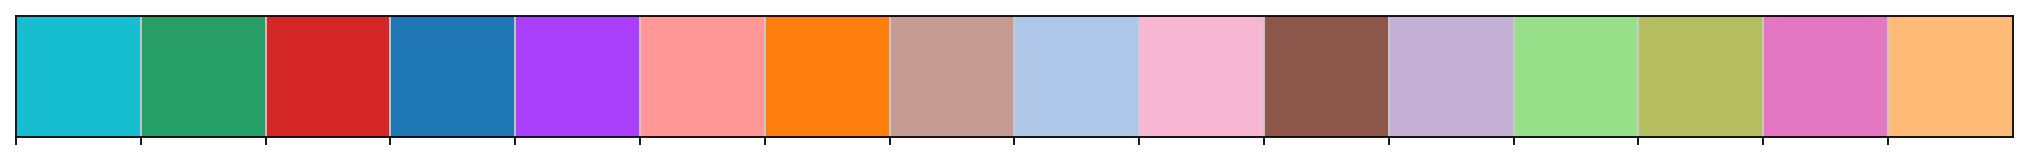

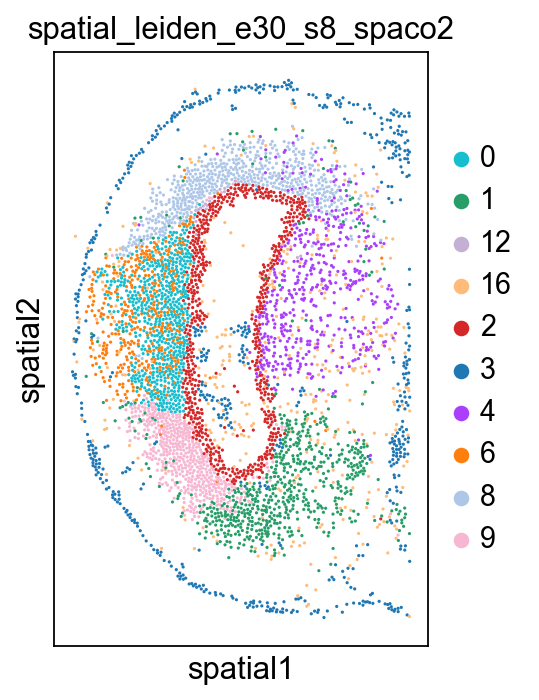

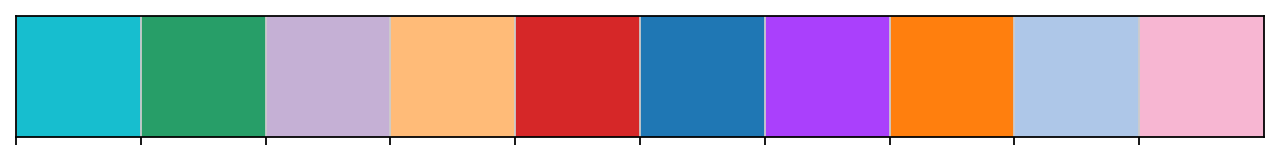

In [18]:
# Get visualization for `seurat_clusters` with optimized color assignment
color_mapping = {k: color_mapping_adata[k] for k in adata.obs[cluster_keys[0]].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata, color=cluster_keys[0] , spot_size=30, palette=palette_spaco)
sns.palplot(palette_spaco)


# Get visualization for `spatial_leiden_e30_s8` with optimized color assignment
color_mapping = {k: color_mapping_adata[k] for k in adata.obs[cluster_keys[1]].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata, color=cluster_keys[1] , spot_size=30, palette=palette_spaco)
sns.palplot(palette_spaco)

In [19]:
import session_info

session_info.show(excludes=['base'])